<a href="https://colab.research.google.com/github/CheayeonLee/ESAA_YB2/blob/main/YB2%EC%A1%B0_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,637 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and di

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 불러오기
train=pd.read_csv("/content/sample_data/movies_train.csv")
test=pd.read_csv("/content/sample_data/movies_test.csv")
submission=pd.read_csv("/content/sample_data/submission.csv")

### 배급사별 분석

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
Name: distributor, dtype: int64


<Axes: xlabel='배급사', ylabel='개봉한 영화 수'>

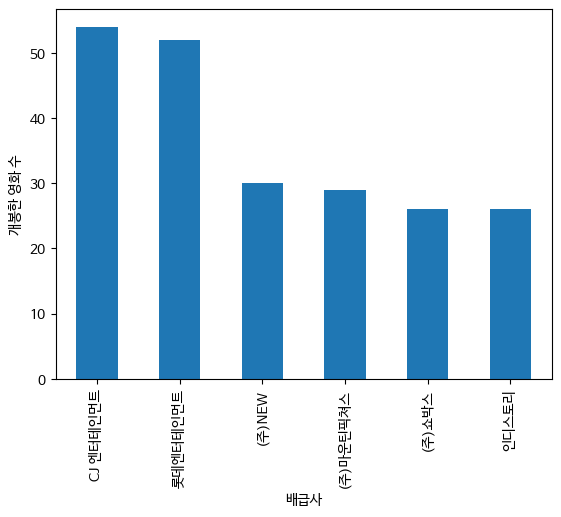

In [4]:
# 1. 가장 많은 영화를 개봉한 배급사
top6 = train['distributor'].value_counts()[:6] # 개봉한 영화 수가 가장 많은 6개 배급사
print(top6)
top6.plot(kind='bar', xlabel='배급사', ylabel='개봉한 영화 수')

In [7]:
# 2. 배급사별 평균 관객 수 
all_num = train.groupby('distributor')['box_off_num'].sum() # 배급사별 총 관객 수
avg_num = all_num / train.groupby('distributor')['box_off_num'].count() # 배급사별 평균 관객 수
top5 = avg_num.sort_values(ascending=False)[0:5] # 평균 관객 수가 가장 많은 5개 배급사
low5 = avg_num.sort_values(ascending=False)[-5:] # 평균 관객 수가 가장 적은 5개 배급사
print("top5:", top5)
print("low5:", low5)

top5: distributor
CJ E&M Pictures    4.122337e+06
(주)쇼박스             3.386656e+06
(주)아이필름코퍼레이션       3.117859e+06
쇼박스(주)미디어플렉스       2.634823e+06
영구아트무비             2.541603e+06
Name: box_off_num, dtype: float64
low5: distributor
나우콘텐츠         54.0
위드시네마         46.0
사람과 사람들       42.0
고구마공작소         8.0
인피니티엔터테인먼트     2.0
Name: box_off_num, dtype: float64


<Axes: xlabel='배급사', ylabel='평균 관객 수(백만)'>

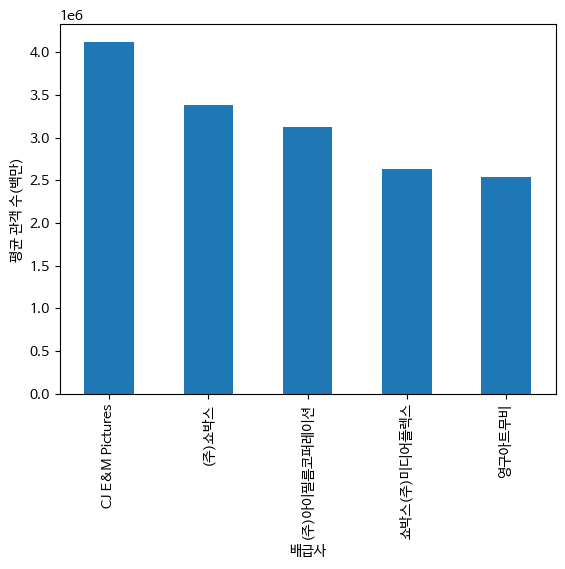

In [8]:
top5.plot(kind='bar', xlabel='배급사', ylabel='평균 관객 수(백만)')

<Axes: xlabel='배급사', ylabel='평균 관객 수'>

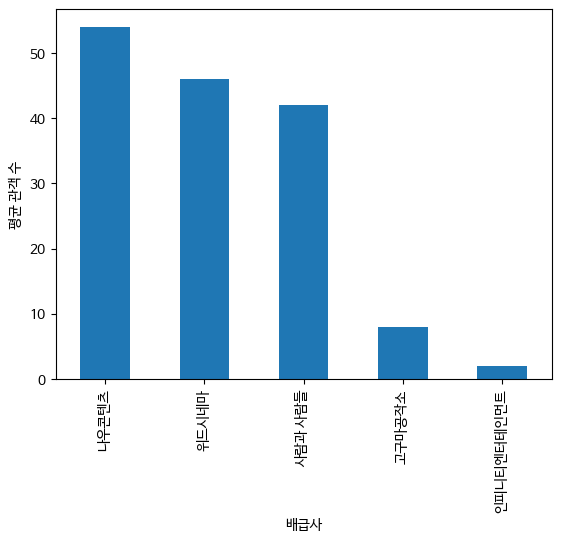

In [9]:
low5.plot(kind='bar', xlabel='배급사', ylabel='평균 관객 수')

### 개봉일별 분석

In [10]:
train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

In [11]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year']=train['release_time'].dt.year   #년도
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

test['release_year']=test['release_time'].dt.year   #년도
test['release_month']=test['release_time'].dt.month   #월
test['release_day']=test['release_time'].dt.day     #일
test['release_weekday']=test['release_time'].dt.weekday   #요일

<Axes: xlabel='release_month'>

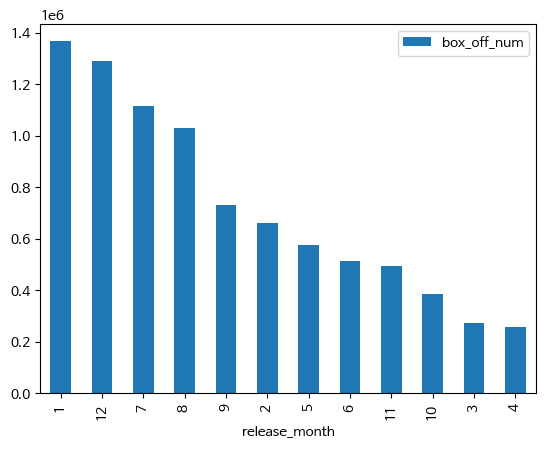

In [12]:
# 1. 개봉월에 따른 평균 관객수
df2 = train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num',ascending = False)
df2

df2.plot(kind='bar')

# 1, 12, 7, 8월 순으로 관객수 평균이 높은 것으로 보아 방학에 관객수가 가장 많고 학기가 새로 시작하는 3, 4월에 관객수가 가장 적은 것을 확인할 수 있다


In [13]:
# 2. 계절별 상영시간에 따른 관객수
train['time'].describe()

def func(quant):
  if quant <= 89.0:
    return 1
  elif quant <=100.0:
    return 2
  elif quant <= 114.0:
    return 3
  else:
    return 4

train['time_quantile'] = train['time'].apply(lambda x: func(x)) 



def func(month):
  if month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  elif month in [9, 10, 11]:
    return 'Fall'
  elif month in [12, 1, 2]:
    return 'Winter'

train['season'] = train['release_month'].apply(lambda x: func(x))

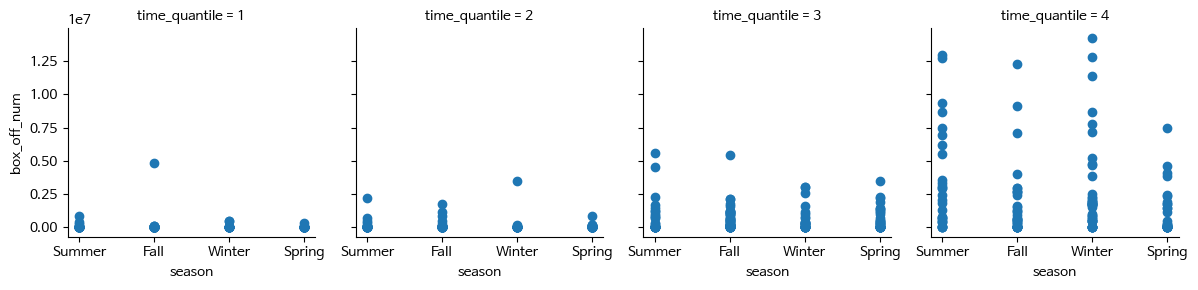

In [14]:
facet = sns.FacetGrid(train, col='time_quantile')
facet = facet.map(plt.scatter, 'season','box_off_num')

분석

- 상영시간이 길어질수록 관객수가 증가함
- 시간 짧은 것들은 계절에서도도 크게 차이가 없음
- 가장 긴 시간에 해당하는 4는 봄을 제외하곤 비슷함
- col='time_quantile'인 경우 경우 보기가 불편

유추

-학기중이라 상영시간이 긴 것은 많이 못 보는 것으로 추측
-방학에 해당하는 여름, 겨울에 관객수가 더 많음

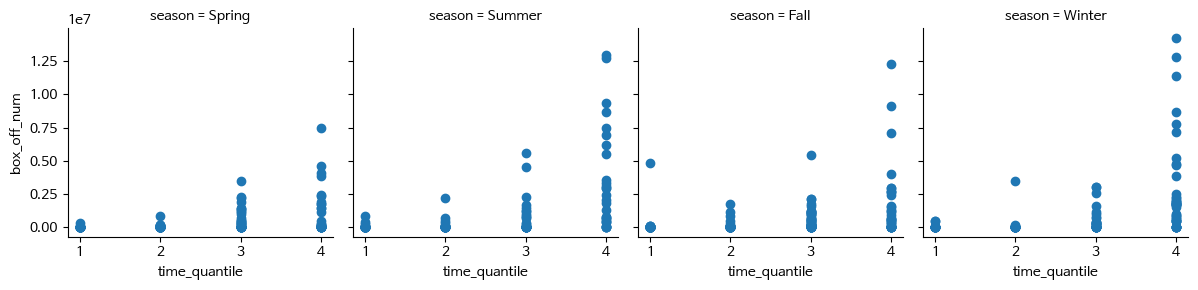

In [15]:
col_order = ['Spring','Summer','Fall','Winter']

facet = sns.FacetGrid(train, col='season', col_order=col_order)
facet = facet.map(plt.scatter, 'time_quantile','box_off_num')

분석

- FacetGrid의 옵션인 col_order를 이용해 계절을 봄, 여름, 가을, 겨울 순서로 설정할 수 있어 위의 그래프보다 한 눈에 파악하기 좋음
- 계절과 관계계없이 상영시간이 길어질수록 관객수가 증가함

유추

- 그러나 봄에는 다른 계절에 비해 관객수가 적은 것으로 보아 '개봉월에 따른 평균 관객수'에서 확인한 바와 같이 3,4월이 학기 중이므로 관객수가 적은 것으로 보임

### 감독별 분석

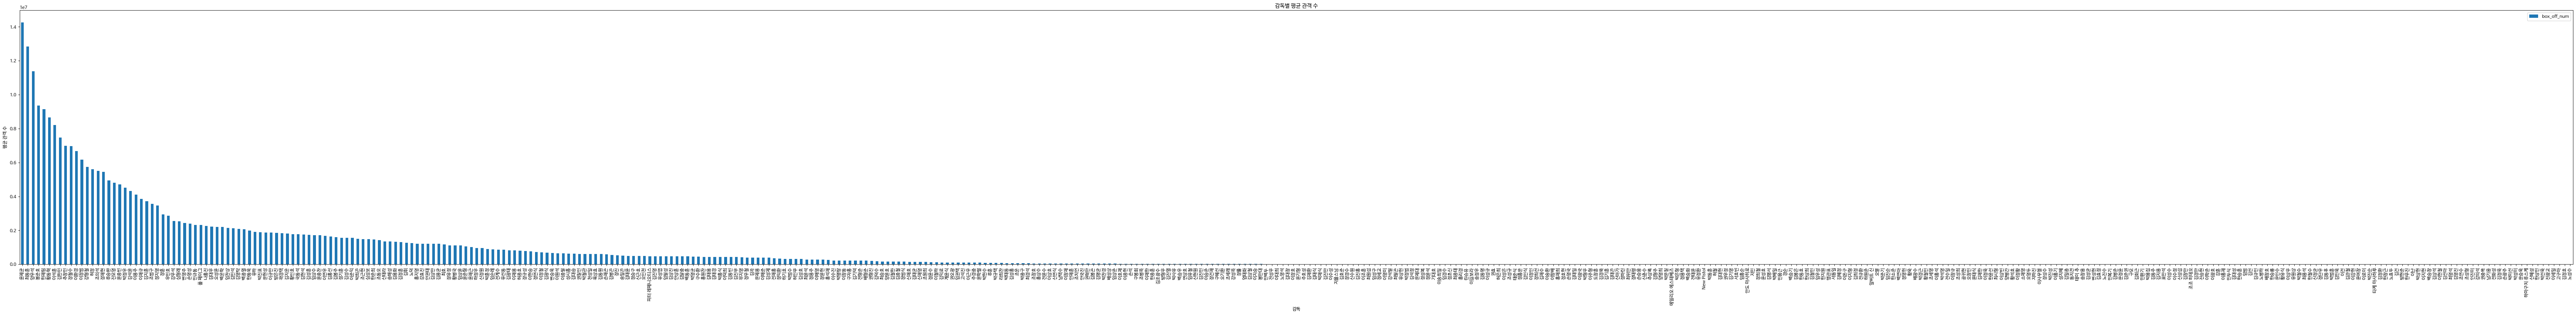

In [16]:
# 1. 감독별 평균 관객 수
import pandas as pd
import matplotlib.pyplot as plt

# director, box_off_num 열 추출
data = train[['director', 'box_off_num']]

# director로 그룹화하고, 'box_off_num'의 평균값 구하기
grouped_data = data.groupby(['director']).mean()

# 평균 관객 수를 기준으로 내림차순 정렬
grouped_data = grouped_data.sort_values(by='box_off_num', ascending=False)

# 그래프 그리기
grouped_data.plot(kind='bar', figsize=(100, 10), rot=90)
plt.title('감독별 평균 관객 수')
plt.xlabel('감독')
plt.ylabel('평균 관객 수')
plt.show()

분석

- 가장 많은 관객수를 기록한 영화는 윤제균 감독의 영화이고, 관객이 10^6 명 이하인 영화가 절반 이상이다.

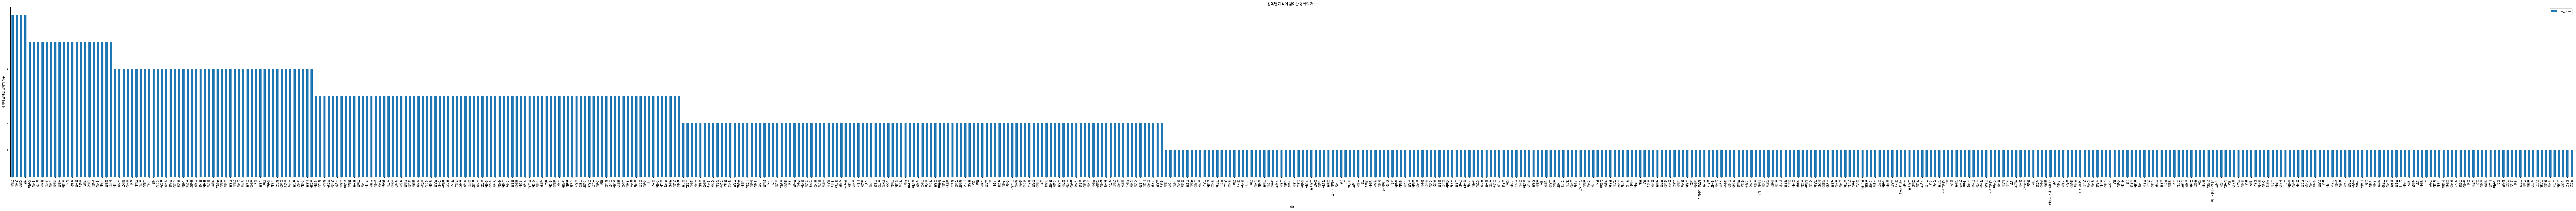

In [17]:
# 2. 감독별 작품 수 - 대부분 1개.
import matplotlib.pyplot as plt

# 'director', 'dir_prev_num' 열 추출
data = train[['director', 'dir_prev_num']]

# dir_num 칼럼 추가
data['dir_num'] = data['dir_prev_num'] + 1

# dir_num 칼럼을 기준으로 내림차순으로 정렬
data = data.sort_values(by='dir_num', ascending=False)

# 그래프 그리기
data.plot(kind='bar', x='director', y='dir_num', figsize=(150, 10), rot=90)
plt.title('감독별 제작에 참여한 영화의 개수')
plt.xlabel('감독')
plt.ylabel('제작에 참여한 영화의 개수')
plt.show()

            감독별 영화 제작 수
제작 참여 영화 수             
1                   330
2                   113
3                    86
4                    47
5                    20
6                     4
7+                    0


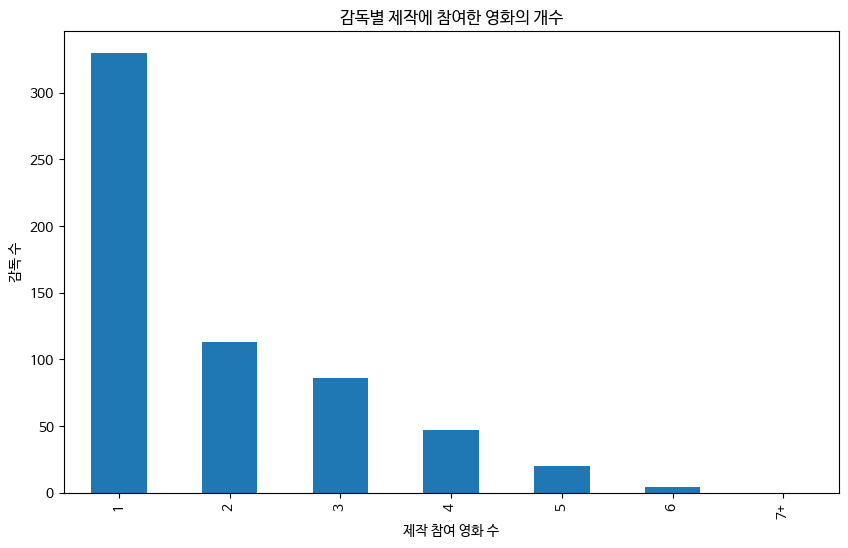

In [18]:
# 2. 추가)
# 감독별 제작에 참여한 영화 수 구하기
dir_counts = pd.cut(data['dir_num'], 
                    bins=[0, 1, 2, 3, 4, 5, 6, float('inf')], 
                    labels=['1', '2', '3', '4', '5', '6', '7+']).value_counts()

# 막대그래프 그리기
dir_counts.plot(kind='bar', figsize=(10, 6))
plt.title('감독별 제작에 참여한 영화의 개수')
plt.xlabel('제작 참여 영화 수')
plt.ylabel('감독 수')

# 데이터프레임으로 정확한 숫자 알아보기
dir_count = pd.DataFrame({'감독별 영화 제작 수': dir_counts})
dir_count.index.name = '제작 참여 영화 수'
print(dir_count)

분석

- 절반 이상인 330명의 감독이 영화를 하나만 만들었다.

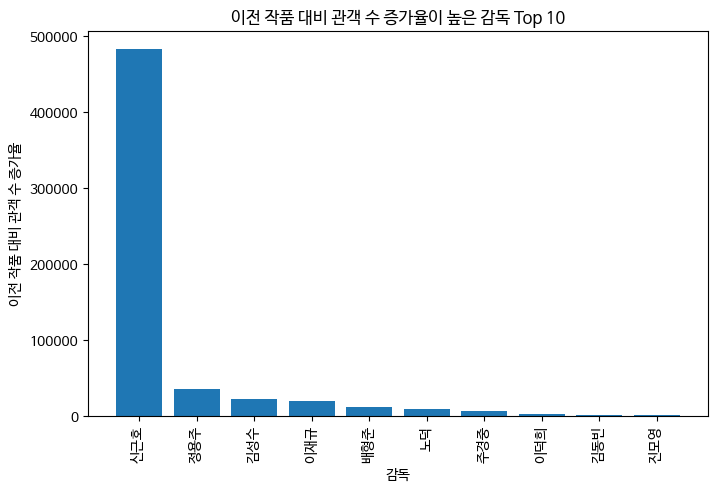

In [19]:
# 3. 이전 작품보다 큰 비율의 관객수 성과를 이뤄낸 감독 순위
# 'director', 'dir_prev_num', 'dir_prev_bfnum', 'box_off_num' 열만 추출
data = train[['director', 'dir_prev_num', 'dir_prev_bfnum', 'box_off_num']]

# 'dir_prev_num'이 0인 데이터 제거
data = data[data['dir_prev_num'] != 0]

# 'ratio' 칼럼 추가
data['ratio'] = (data['box_off_num'] - data['dir_prev_bfnum']) / data['dir_prev_bfnum']

# 감독별 'ratio' 평균 구하기
grouped_data = data.groupby('director')['ratio'].mean()

# 평균값 내림차순 정렬
grouped_data = grouped_data.sort_values(ascending=False)

# Top 10 선택
top_10 = grouped_data.head(10)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(top_10.index, top_10)
plt.title('이전 작품 대비 관객 수 증가율이 높은 감독 Top 10')
plt.xlabel('감독')
plt.ylabel('이전 작품 대비 관객 수 증가율')
plt.xticks(rotation=90)
plt.show()

분석

- 이전 작품 대비 관객 수 증가율이 높은 감독 1순위는 신근호 감독이다.

### 상영등급별 분석

In [20]:
#필요한 정보만 담은 dataframe 만들기
df = pd.DataFrame({'screening_rat': train['screening_rat'],
                   'genre' : train['genre'],
                   'value': 1,
                   'box_off_num': train['box_off_num']})

# Show 3 first rows
df.head(3)

,screening_rat,genre,value,box_off_num
0,청소년 관람불가,액션,1,23398
1,청소년 관람불가,느와르,1,7072501
2,15세 관람가,액션,1,6959083


In [21]:
# 전체 정렬
output = df.groupby(['screening_rat', 'genre']).sum()
output = output.reset_index()
output

,screening_rat,genre,value,box_off_num
0,12세 관람가,SF,3,8671086
1,12세 관람가,공포,1,1079
2,12세 관람가,다큐멘터리,23,361295
3,12세 관람가,드라마,50,44085238
4,12세 관람가,멜로/로맨스,10,13555789
5,12세 관람가,뮤지컬,1,3089
6,12세 관람가,애니메이션,3,39560
7,12세 관람가,액션,1,609063
8,12세 관람가,코미디,10,18861853
9,15세 관람가,SF,6,14561678


분석

- 새로 만들어진 'output' 데이터프레임은, 각 등급 별 장르에 따른 영화의 수가 몇 개인지, 그리고 같은 등급 별 같은 장르의 영화관객수의 총합의 정보를 가지고 있다.

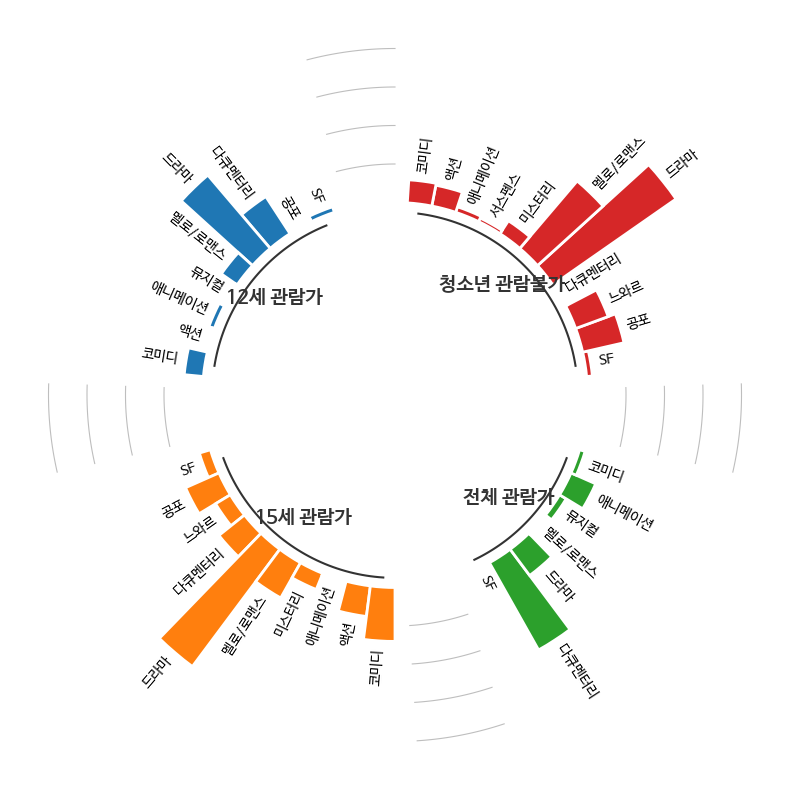

In [22]:
# 1. 등급에 따른 장르 영화 수
#  원에 들어갈 각도 계산
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

#원에 들어갈 label 덧붙여주기
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 


# All this part is like the code above
VALUES = output["value"].values
LABELS = output["genre"].values
GROUP = output["screening_rat"].values

PAD = 3
OFFSET = np.pi / 2
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [9, 10, 7, 11]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [9, 10, 7, 11]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(np.unique(GROUP), GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD


분석
 
- 각 등급 별 장르의 영화 수이다. 이 표에 따르면, 전체관람가에서는 다큐멘터리가, 12세 관람가에서는 드라마가, 15세 관람가에서는 드라마가, 청소년 관람불가에서도 드라마가 가장 개봉 수가 많음을 알 수 있다.

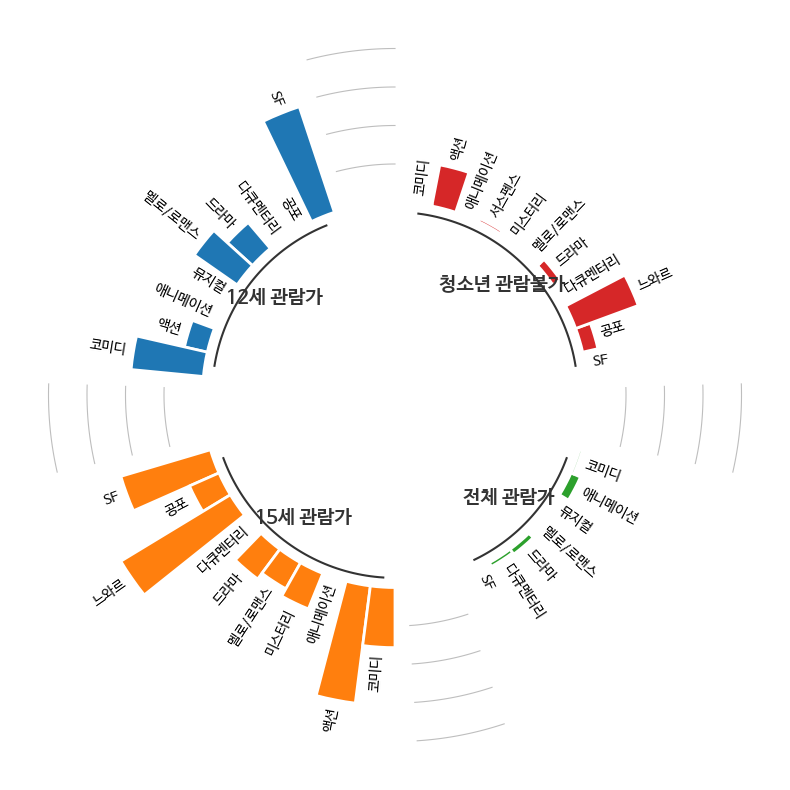

In [23]:
#상영등급 별 genre 별 평균 관객 수

# All this part is like the code above
VALUES = ( output["box_off_num"].values / output["value"].values ) / 50000  #단위: 5만명
LABELS = output["genre"].values
GROUP = output["screening_rat"].values

PAD = 3
OFFSET = np.pi / 2
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [9, 10, 7, 11]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [9, 10, 7, 11]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(np.unique(GROUP), GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

분석

- 이 표는 등급별 장르의 관객수의 평균을 5만명으로 나눈 것이다. 즉, 15세 관람가의 액션에 속하는 모든 영화의 관객수를 평균을 내 5만명으로 나눈 것이 이 그래프의 막대의 길이이다. 위를 보면, 전체관람가의 관객수는 전체적으로 작으나, 그 중 애니메이션이 가장 크다. 12세과 15세의 경우, 비교적 고르게 관람객의 수가 많으며, 12세는 sf, 15세는 느와르의 관객수가 평균적으로 많다고 볼 수 있다.청소년 관람불가의 경우, 느와르의 관객수가 평균적으로 많다고 볼 수 있다.

### 장르별 분석

In [24]:
# 1. 장르별 상영등급별 관객 수
train.groupby('genre')['screening_rat'].value_counts()

genre   screening_rat
SF      15세 관람가           6
        12세 관람가           3
        청소년 관람불가          3
        전체 관람가            1
공포      청소년 관람불가         22
        15세 관람가          19
        12세 관람가           1
느와르     청소년 관람불가         18
        15세 관람가           9
다큐멘터리   전체 관람가           52
        12세 관람가          23
        15세 관람가          17
        청소년 관람불가          1
드라마     청소년 관람불가         78
        15세 관람가          76
        12세 관람가          50
        전체 관람가           17
멜로/로맨스  청소년 관람불가         46
        15세 관람가          21
        12세 관람가          10
        전체 관람가            1
뮤지컬     전체 관람가            4
        12세 관람가           1
미스터리    15세 관람가           9
        청소년 관람불가          8
서스펜스    청소년 관람불가          2
애니메이션   전체 관람가           14
        12세 관람가           3
        청소년 관람불가          3
        15세 관람가           1
액션      15세 관람가          16
        청소년 관람불가         11
        12세 관람가           1
코미디     15세 관람가          28
        청소년 관람불가         1

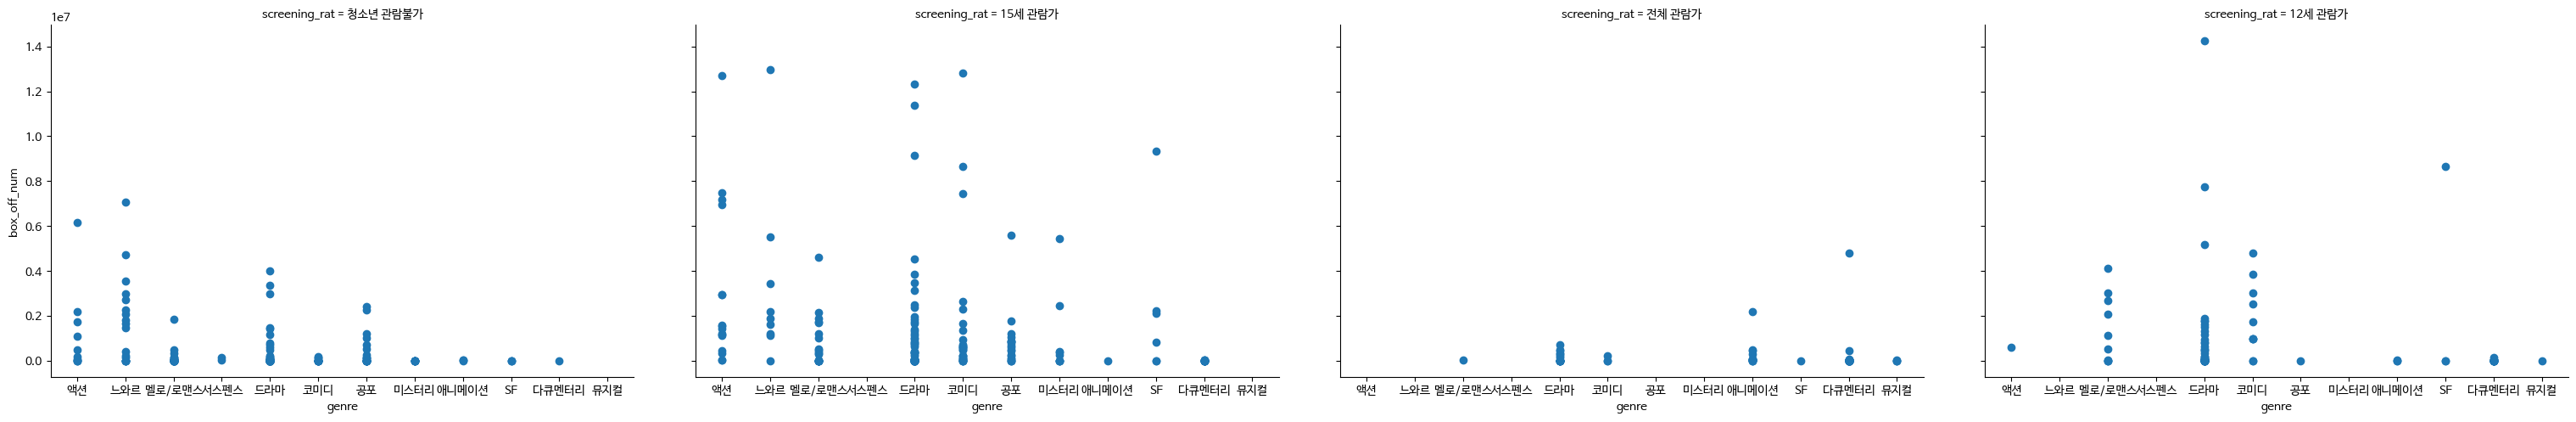

In [25]:
# 위 내용을 시각화해보면
facet = sns.FacetGrid(train, col='screening_rat')
facet = facet.map(plt.scatter, 'genre', 'box_off_num')
facet.fig.set_size_inches(32,6)   # 그래프 x축 한글 겹침 발생 -> 그래프 크기 바꿔주기

분석

- 영화 관람 제한 연령대가 높아질수록 더 많은 작품이 존재하고, 더 다양한 분야의 영화가 존재하고, 더 많은 관객수인 추세임을 알 수 있다.
- 점의 갯수로 보아, 15세 관람가의 영화가 제일 많이 존재하고 제일 많은 관객들이 본다는 사실을 알 수 있다.

유추

- 전체 관람가의 경우 제한되는 내용이 많은 만큼 영화장르의 범위가 제한되어 장르수가 적고, 이에 따라 관객 수도 적은 것이라고 유추해 볼 수 있다.
- 반대로, 청소년 관람불가의 경우 제한되는 내용이 훨씬 줄어든 만큼 자극적인 내용이 많이 들어가있어 모든 관객이 선호하기는 어렵기 때문에 청소년 관람불가보다 15세 관람가 영화가 보다 많이 존재하고, 많은 관객이 본다고 유추해 볼 수 있다.

In [26]:
# 2. 장르별 상영시간
train[['genre','time']].groupby('genre').mean().sort_values('time')

,time
genre,
애니메이션,82.571429
다큐멘터리,88.053763
멜로/로맨스,96.641026
공포,100.214286
SF,101.384615
미스터리,102.588235
드라마,104.651584
코미디,105.264151
뮤지컬,107.000000


<Axes: xlabel='genre'>

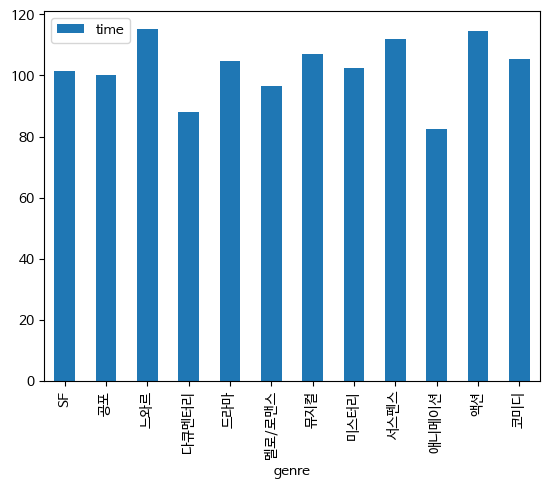

In [27]:
# 위 표를 시각화해보면
train[['genre','time']].groupby('genre').mean().plot(kind='bar')

분석
- 느와르 장르의 영화가 제일 상영시간이 길고, 애니메이션 장르의 영화가 제일 상영시간이 짧은 것을 볼 수 있다.

유추
- 장르 특성상 느와르 장르의 경우 주관객 연령대가 높은 반면, 애니메이션 장르의 경우 낮기 때문에 상영시간 또한 차이가 나는 것이 아닐까 하고 유추해볼 수 있다.

<Axes: xlabel='genre'>

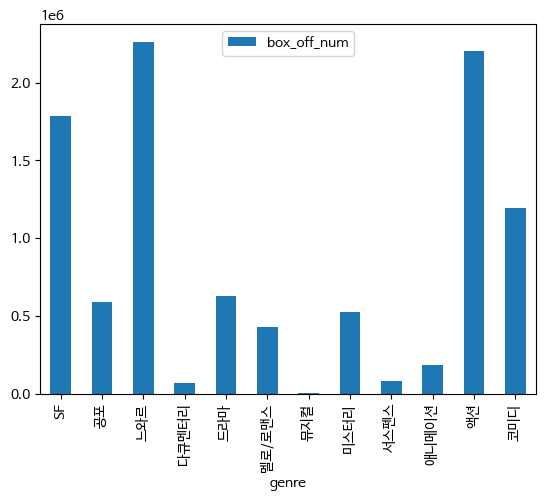

In [28]:
# 3. 장르별 관객수 -> 관객들의 장르별 인지도 파악 가능
# 1. 바 그래프
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')
train[['genre','box_off_num']].groupby('genre').mean().plot(kind='bar')

분석
- 가장 많은 관객이 본 영화는 느와르, 액션 영화이며, 가장 적은 관객이 본 영화는 뮤지컬 영화이다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '액션'),
  Text(1, 0, '느와르'),
  Text(2, 0, '코미디'),
  Text(3, 0, '다큐멘터리'),
  Text(4, 0, '뮤지컬'),
  Text(5, 0, '드라마'),
  Text(6, 0, '멜로/로맨스'),
  Text(7, 0, '공포'),
  Text(8, 0, '서스펜스'),
  Text(9, 0, '애니메이션'),
  Text(10, 0, '미스터리'),
  Text(11, 0, 'SF')])

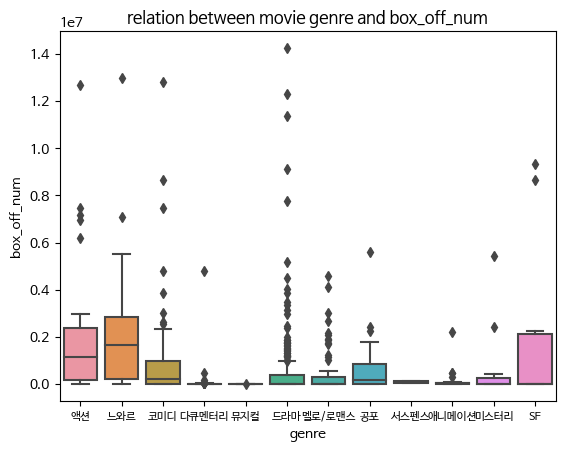

In [29]:
# 2. 박스 그래프 -> 더 자세히 보기 위해서
ax = sns.boxplot(data=train, x='genre', y='box_off_num')
ax.set_title('relation between movie genre and box_off_num')
plt.xticks(fontsize=8)    # x축 레이블 값 구간 설정 -> 글자 겹침 방지